# Supervised Learning

Supervised learning is broken up into two main types, _classification_ and _regression_. We'll go over a couple examples using $k$NN using scikit-learn (sklearn).

## scikit-learn API

We'll be using scikit-learn throughout the introductory portion of the class and so it's important to understand the basic API that models in that library implement. Models in scikit-learn are called _Estimators_ and the steps to use some of them are:

1. Initialize the model by setting its parameters `model = Model(param_1=val, param_2=val)`
1. Fit the model using `model.fit(features, labels)`
1. Predict using the model `model.predict(features)`


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

We're going to start by making some synthetic data that we can use to train some models.

In [3]:
X, y = make_blobs(n_samples=1000,random_state=0)

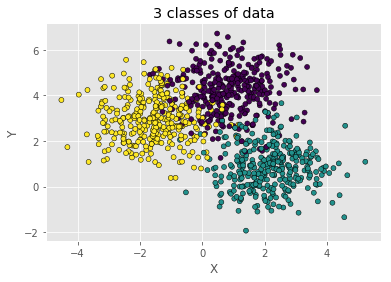

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.title("3 classes of data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Next we're going to split all our data into train and test sets then split the train set into model and validation.
We do so using sklearn's [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, random_state=0, test_size=0.2)

print(f"All Data:        {len(X)} points")
print(f"Training data:   {len(X_train)} points")
print(f"Testing data:    {len(X_test)} points")
print(f"Modeling data:   {len(X_model)} points")
print(f"Validation data: {len(X_valid)} points")

All Data:        1000 points
Training data:   800 points
Testing data:    200 points
Modeling data:   640 points
Validation data: 160 points


Now we will load the models that we're going to use to fit this data. We will use sklearn's [$k$NN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
k = 5

In [8]:
# Step 1 - Initialize model with parameters
knn = KNeighborsClassifier(n_neighbors=k)
# Step 2 - Fit the model data
knn.fit(X_model, y_model)
# Step 3 - Predict the validation data
validationPredictions = knn.predict(X_valid)

Now that we have a model trained, we'll need to evaluate it. We'll load some classification metrics:

1. [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
1. [Confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
1. [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [10]:
print(confusion_matrix(y_valid, validationPredictions))

[[50  5  3]
 [ 1 40  1]
 [ 5  3 52]]


In [11]:
print(classification_report(y_valid,validationPredictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        58
           1       0.83      0.95      0.89        42
           2       0.93      0.87      0.90        60

   micro avg       0.89      0.89      0.89       160
   macro avg       0.88      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



In [12]:
f1_score(y_valid, validationPredictions, average="weighted")

0.8875226860254084

Let's use the weighted F-1 score as the metric to measure how good a model is and use the validation set to determine the best value for `k` neighbors.

In [20]:
def get_knn_training_scores(ks, model_features, model_labels):
    """Determine the f1-score of k values for kNN on a given data set
    Args:
        ks (int iterable): iterable of all the k values to apply
        model_features (iterable): the features from the model set to train on
        model_labels (iterable): the labels from the model set to train on
        
    Returns:
        dictionary: key is the k value and value is the weighted f1_score on the validation set
    """
    dic = {}
    for k in ks:
        # intialize model with parameter k
        knn = KNeighborsClassifier(n_neighbors=k)
        # fit the model
        knn.fit(model_features, model_labels)
        # Predict the validation data
        validationPredictions = knn.predict(model_features)
        # get the f1_score and save it in the dictionary
        value = f1_score(model_labels, validationPredictions, average="weighted")
        dic[k] = value
    return dic

In [21]:
ks = [1,2,3]
test_knn_train = get_knn_training_scores(ks, X_model, y_model)
assert list(test_knn_train.keys()) == ks
assert len(test_knn_train.keys()) == 3
assert np.array(list(test_knn_train.values())).all() <= 1
assert np.array(list(test_knn_train.values())).all() > 0

In [24]:
def get_knn_validation_scores(ks, model_features, model_labels, validation_features, validation_labels):
    """Train a model on a dataset then return the F-1 score on another set
    Args:
        ks (int iterable): iterable of all the k values to apply
        model_features (iterable): the features from the model set to train on
        model_labels (iterable): the labels from the model set to train on
        validation_features (iterable): the features from the validation set to test on
        validation_labels (iterable): the labels from the validation set to test on
        
    Returns:
        dictionary: key is the k value and value is the weighted f1_score on the validation set
    """
    dic = {}
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        # fit the model
        knn.fit(model_features, model_labels)
        # Predict the validation data
        validationPredictions = knn.predict(validation_features)
        # get the f1_score and save it in the dictionary
        value = f1_score(validation_labels, validationPredictions, average="weighted")
        dic[k] = value
        
    return dic
        
        

In [25]:
ks = [1,2,3]
test_knn_valid = get_knn_validation_scores(ks, X_model, y_model, X_valid, y_valid)
assert list(test_knn_train.keys()) == ks
assert len(test_knn_train.keys()) == 3
assert np.array(list(test_knn_train.values())).all() <= 1
assert np.array(list(test_knn_train.values())).all() > 0
assert test_knn_valid != test_knn_train

Now let's use these functions to determine the best value for $k$.

In [26]:
ksToTest = [1,3,5,7,10,20,50,100]
training_scores = get_knn_training_scores(ksToTest, X_model, y_model)
validation_scores = get_knn_validation_scores(ksToTest, X_model, y_model, X_valid, y_valid)

Here, we'll plot the training and validation scores that were returned from the functions. 

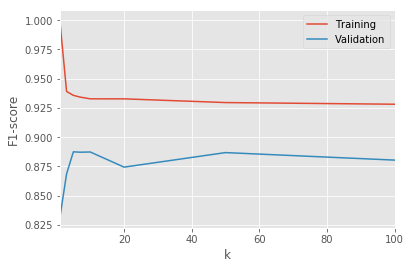

In [27]:
pd.Series(training_scores, name="Training").plot(kind="line")
pd.Series(validation_scores, name="Validation").plot(kind="line", label="Validation")
plt.legend()
plt.xlabel("k")
plt.ylabel("F1-score")
plt.show()

In [28]:
# Select the best value for k and set it to bestK
bestK = 50

In [29]:
clf = KNeighborsClassifier(bestK)
clf.fit(X_train, y_train)
testPredictions = clf.predict(X_test)

After selecting the best hyperparameter, we see how well it does on the test dataset as a sanity check. This is our final check after training the models to confirm that our validation was sufficient. 

In [30]:
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, testPredictions))
print("\n\nClassification Report:\n")
print(classification_report(y_test, testPredictions))

Confusion Matrix: 

[[50  1  7]
 [ 4 67  0]
 [ 6  1 64]]


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        58
           1       0.97      0.94      0.96        71
           2       0.90      0.90      0.90        71

   micro avg       0.91      0.91      0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



In [31]:
assert f1_score(y_test, testPredictions, average="weighted") > 0.9

## Feedback

In [32]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "Some of the scaffolding for this in class was missing but it covered some important topics and allowed us to build our own lgoic units which wa nice."